In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
df=pd.read_excel("/home/user/Desktop/env2/VAR/Libor_sofr_org_value_adjusted.xlsx")
df=df[["Date","LIBOR ON","SOFR Index","SONIA DAILY RATE","TIIE DAILY AVG RATES"]]
df.tail()

,Date,LIBOR ON,SOFR Index,SONIA DAILY RATE,TIIE DAILY AVG RATES
1339,31.03.2021,0.07288,1.042075,0.0475,4.20
1340,01.04.2021,0.07475,1.042076,0.0475,NaN
1341,05.04.2021,0.07475,1.042077,0.0482,4.06
1342,06.04.2021,0.07788,1.042077,0.0483,4.03
1343,07.04.2021,0.07625,1.042077,0.0483,4.01


In [3]:
df.index=df["Date"]


In [4]:
df.drop("Date",axis=1,inplace=True)

In [5]:
df.tail()

,LIBOR ON,SOFR Index,SONIA DAILY RATE,TIIE DAILY AVG RATES
Date,,,,
31.03.2021,0.07288,1.042075,0.0475,4.20
01.04.2021,0.07475,1.042076,0.0475,NaN
05.04.2021,0.07475,1.042077,0.0482,4.06
06.04.2021,0.07788,1.042077,0.0483,4.03
07.04.2021,0.07625,1.042077,0.0483,4.01


In [6]:
df.ffill(axis=0,inplace=True)

In [7]:
def normalize(df,col):
    df=df.copy()
    return (df[col]-df[col].min())/(df[col].max()-df[col].min())


def MACD(df,slow=26,fast=12,signal=9,colname=None):
    if colname==None:
        print("colnam")
        df=df.copy()
        df["ema_slow"]=df["ON"].ewm(slow).mean()
        df["ema_fast"]=df["ON"].ewm(fast).mean()
        df["macd"]=df["ema_fast"]-df["ema_slow"]
        df["signal"]=df["macd"].ewm(signal).mean()
        df.dropna(inplace=True)
    else:
        df=df.copy()
        df["ema_slow"]=df[colname].ewm(slow).mean()
        df["ema_fast"]=df[colname].ewm(fast).mean()
        df["macd"]=df["ema_fast"]-df["ema_slow"]
        df["signal"]=df["macd"].ewm(signal).mean()
        df.dropna(inplace=True)
    return df

In [8]:
df["libor_norm"]=normalize(df,"LIBOR ON")
df["SOFR_norm"]=normalize(df,"SOFR Index")
df["SONIA_norm"]=normalize(df,"SONIA DAILY RATE")
df["TIIE_norm"]=normalize(df,"TIIE DAILY AVG RATES")

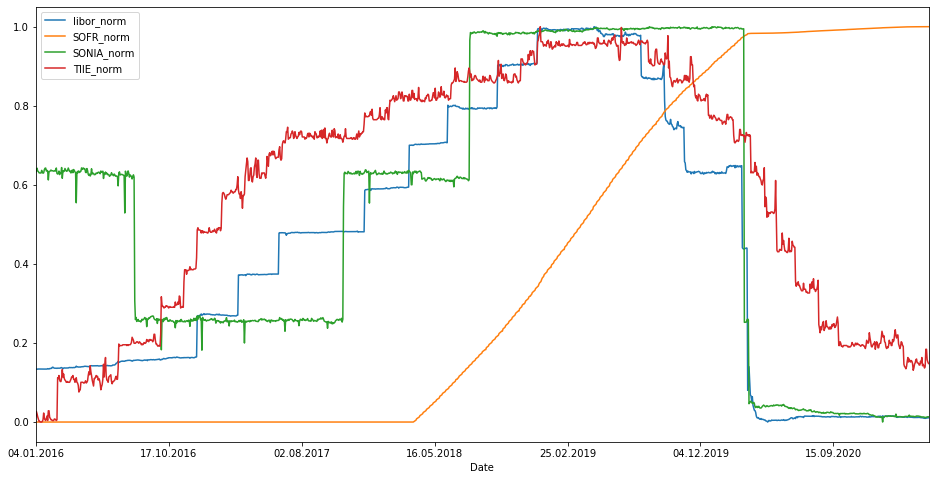

In [9]:
plt.figure(figsize=(16,8))
df["libor_norm"].plot(legend=True)
df["SOFR_norm"].plot(legend=True)
df["SONIA_norm"].plot(legend=True)
df["TIIE_norm"].plot(legend=True)

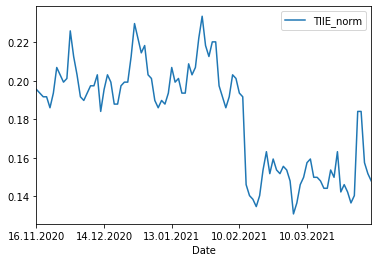

In [10]:
df["TIIE_norm"][-100:].plot(legend=True)

In [11]:
df["LIBOR_SIGNAL"]=MACD(df,colname="libor_norm")["signal"]
df["SOFR_SIGNAL"]=MACD(df,colname="SOFR_norm")["signal"]
df["SONIA_SIGNAL"]=MACD(df,colname="SONIA_norm")["signal"]
df["TIIE_SIGNAL"]=MACD(df,colname="TIIE_norm")["signal"]
df["ZERO"]=0

Text(0.5, 1.0, 'SIGNAL LINE PLOT USING MACD FOR OVERNIGHT RATES')

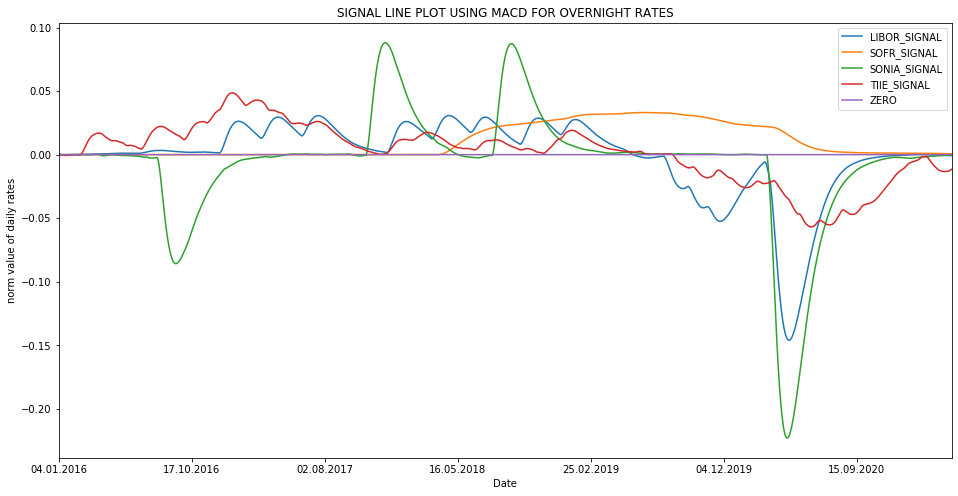

In [12]:
plt.figure(figsize=(16,8))

df["LIBOR_SIGNAL"].plot(legend=True)
df["SOFR_SIGNAL"].plot(legend=True)
df["SONIA_SIGNAL"].plot(legend=True)
df["TIIE_SIGNAL"].plot(legend=True)
df["ZERO"].plot(legend=True)
plt.ylabel("norm value of daily rates")
plt.title("SIGNAL LINE PLOT USING MACD FOR OVERNIGHT RATES")

In [13]:
def variance(data):
# Number of observations
    n = len(data)
    # Mean of the data
    mean = sum(data) / n
    # Square deviations
    deviations = [(x - mean) ** 2 for x in data]
    # Variance
    variance = sum(deviations) / n
    return variance,math.sqrt(variance)

In [14]:
variance(df["SONIA DAILY RATE"])

(0.06219288960414352, 0.24938502281440944)

In [15]:
df["%changeLIBOR"]=df["LIBOR ON"].pct_change().rolling(20).std()*(252**0.5)
df["%changeSOFR"]=df["SOFR Index"].pct_change().rolling(20).std()*(252**0.5)
df["%changeSONIA"]=df["SONIA DAILY RATE"].pct_change().rolling(20).std()*(252**0.5)
df["%changeTIIA"]=df["TIIE DAILY AVG RATES"].pct_change().rolling(20).std()*(252**0.5)

In [16]:
df["%changeLIBOR"]=normalize(df,"%changeLIBOR")
df["%changeSOFR"]=normalize(df,"%changeSOFR")
df["%changeSONIA"]=normalize(df,"%changeSONIA")
df["%changeTIIA"]=normalize(df,"%changeTIIA")

Text(0.5, 1.0, 'PLOT OF PERCENTAGE CHANGES USING ROLLING MEAN FOR DAILY RATES')

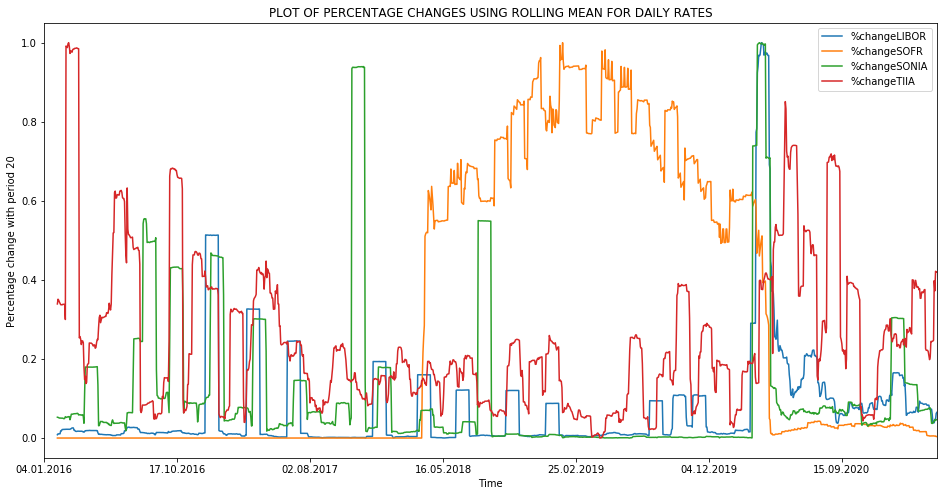

In [20]:
plt.figure(figsize=(16,8))

df["%changeLIBOR"].plot(legend=True)
df["%changeSOFR"].plot(legend=True)
df["%changeSONIA"].plot(legend=True)
df["%changeTIIA"].plot(legend=True)
plt.ylabel("Percentage change with period 20")
plt.xlabel("Time")
plt.title("PLOT OF PERCENTAGE CHANGES USING ROLLING MEAN FOR DAILY RATES")

In [18]:
df["%changeTIIA"].min(),df["%changeTIIA"].max()

(0.0, 1.0)

In [19]:
df["%changeTIIA"].dropna()

Date
01.02.2016    0.339168
02.02.2016    0.351127
03.02.2016    0.348540
04.02.2016    0.344174
05.02.2016    0.340700
08.02.2016    0.337268
09.02.2016    0.337268
10.02.2016    0.336742
11.02.2016    0.338143
12.02.2016    0.338143
15.02.2016    0.338447
16.02.2016    0.337299
17.02.2016    0.299837
18.02.2016    0.991429
19.02.2016    0.989949
22.02.2016    0.987622
23.02.2016    0.997303
24.02.2016    1.000000
25.02.2016    0.989949
26.02.2016    0.972791
29.02.2016    0.979447
01.03.2016    0.978084
02.03.2016    0.975837
03.03.2016    0.982017
04.03.2016    0.983952
07.03.2016    0.983792
08.03.2016    0.985700
09.03.2016    0.985700
10.03.2016    0.986110
11.03.2016    0.986915
                ...   
24.02.2021    0.381882
25.02.2021    0.382033
26.02.2021    0.375156
01.03.2021    0.377806
02.03.2021    0.353406
03.03.2021    0.353565
04.03.2021    0.368908
05.03.2021    0.369385
08.03.2021    0.367277
09.03.2021    0.370122
10.03.2021    0.374839
11.03.2021    0.375669
12.03.